<a href="https://colab.research.google.com/github/ShaifaliKhulbe/Project_1/blob/main/Clustering_Tweets_using_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import re
import seaborn as sns

stop = set(stopwords.words("english"))

In [ ]:
def preprocess(text):

  text_input = re.sub('[^a-zA-Z1-9]+', ' ', str(text))

  output = re.sub(r'\d+', '',text_input)

  return output.lower().strip()

def remove_stopwords(text):

  filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]

  return " ".join(filtered_words)

In [ ]:
data = pd.read_csv("/content/sentiment_culture_.csv")

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweet_id,user_name,user_description,total_user_tweets,time,tweet,location,...,following,hashtags,likes,number_of_retweets,quote_tweet_count,total_count,cleaned_tweet,polarity,subjectivity,Sentiment
0,0,0,0,1612145984569499648,NB Geek 🇺🇸,We are not civilized. We are just savages livi...,12756,2023-01-08 17:55:29,@ClackShaw @QasimRashid It is a great culture ...,The sicks of Indiana,...,278,[],0,0,0,0,"it is a great culture full of love, acceptance...",0.550000,0.633333,Positive
1,1,1,1,1612145983294431236,wwerf PhD 🚫🙎🏼‍♀️🚫,triple ♏️ // nsfw//this whole page is a tw// $...,10825,2023-01-08 17:55:29,something so beautiful about dating within you...,"Texas, USA",...,348,[],0,0,0,0,something so beautiful about dating within you...,0.725000,1.000000,Positive
2,2,2,2,1612145981025550336,ANC Dweller,casual observer,3233,2023-01-08 17:55:28,@republic_reason @SenateGOP And endorsed a cul...,NaN,...,285,[],0,0,0,0,and endorsed a culture that lead to a 6 year o...,0.100000,0.200000,Positive
3,3,3,3,1612145968836665344,Kenyans On Reddit 🇰🇪,Come join your fellow Kenyans™ on Reddit 👉 htt...,67961,2023-01-08 17:55:25,✦ [ Mahrez ] ● Culture &amp; Religion \n\nWhat...,Nairobi,...,17,[],0,0,0,0,✦ [ mahrez ] ● culture &amp; religion \n\nwhat...,0.000000,0.000000,Neutral
4,4,4,4,1612145968379756544,A New Tale Is Far Away...,Just a happy go lucky Alberta Cowgirl. Pro BLM...,1719,2023-01-08 17:55:25,@Wallace34196736 @kristypilip @RachelNotley Lo...,NaN,...,69,[],0,0,0,0,"lol not your kind of ""freedom"" hence why your ...",0.700000,0.800000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,3169,3169,3169,1612122656018501632,Renato,"Everything happens for a reason, but sometimes...",747070,2023-01-08 16:22:47,More murders in the new year than days. New Or...,Below Sea Level,...,1984,[],0,1,0,1,more murders in the new year than days. new or...,0.257576,0.469697,Positive
3170,3170,3170,3170,1612122642403803141,Jeremy,Joe Schmo from OH HI O!,403,2023-01-08 16:22:44,@stillgray Does Thailand not count as the east...,"Ohio, USA",...,104,[],3,0,0,3,does thailand not count as the east? my unders...,0.000000,0.500000,Neutral
3171,3171,3171,3171,1612122622225174530,Larry Kraus,Fine Art Landscape photographer highlighting t...,54,2023-01-08 16:22:39,"@DLoesch Unfortunately, this is our future giv...","St George, Utah",...,29,[],0,0,0,0,"unfortunately, this is our future given the de...",-0.266667,0.508333,Negative
3172,3172,3172,3172,1612122616936148994,Negative Steve 🏳️‍🌈🏳️‍⚧️🇮🇪🇺🇸💚♻️☮️✝️☯️☮️,I don’t care. I won’t listen to your conspirac...,5980,2023-01-08 16:22:38,@Schaman_34 @beanhead54 @JoJoFromJerz So teach...,"Hell, MI",...,143,[],0,0,0,0,so teaching kids that we killed the native ame...,-0.100000,0.000000,Negative


In [ ]:
data['cleaned_tweet'] = data.cleaned_tweet.map(preprocess)

data['cleaned_tweet	'] = data.cleaned_tweet.map(remove_stopwords)

In [ ]:
data['cleaned_tweet	']

0       great culture full love acceptance tolerance t...
1               something beautiful dating within culture
2       endorsed culture lead year old shooting st gra...
3       mahrez culture amp religion difference guy amp...
4                 lol kind freedom hence culture replaced
                              ...                        
3169            murders new year days new orleans culture
3170    thailand count east understanding open culture...
3171    unfortunately future given decimation laws cul...
3172    teaching kids killed native americans enslaved...
3173    nobody thinks mind boggling people fall cultur...
Name: cleaned_tweet\t, Length: 3174, dtype: object

In [ ]:
def build_corpus(data):

  corpus = []

  for sentence in data.iteritems():

    word_list = sentence[1].split(" ")

    corpus.append(word_list)

  return corpus

corpus = build_corpus(data['cleaned_tweet'])

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(corpus, size=100, min_count=1)

In [ ]:
model.wv

In [ ]:
from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors
#vectors = model.wv.vocab

vectors = model[model.wv.vocab]

#vocab = w2v_model.wv.key_to_index.keys()
words = list(model.wv.vocab)

pca = PCA(n_components=2)

PCA_result_scores = pca.fit_transform(vectors)

# prepare a dataframe

words = pd.DataFrame(words)

PCA_result = pd.DataFrame(PCA_result_scores)

PCA_result['x_values'] =PCA_result.iloc[0:, 0]

PCA_result['y_values'] =PCA_result.iloc[0:, 1]

PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)

PCA_final['word'] =PCA_final.iloc[0:, 0]

PCA_data_complet =PCA_final[['word','x_values','y_values']]

<ipython-input-38-ffae91c72b48>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model[model.wv.vocab]


In [ ]:
PCA_data_complet.to_csv('PCA_data_complet.csv',index=False)

In [ ]:
PCA_data_complet

,word,x_values,y_values
0,it,5.381099,-0.019941
1,is,6.475116,-0.009914
2,a,7.012401,-0.021929
3,great,1.997326,-0.005385
4,culture,6.969758,-0.000837
...,...,...,...
8125,orleans,-0.174426,0.002774
8126,tansgenderism,-0.211622,-0.002956
8127,decimation,-0.164317,0.004522
8128,boggling,-0.208845,0.001808


In [ ]:
# word frequencies calculation
from collections import Counter
# count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(data.cleaned_tweet)
words_all = counter_all.most_common(100)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('top100_words.csv', columns=['word','count'], index=False)

In [ ]:
# restriction to 100 most frequent words
top100_words = pd.read_csv('top100_words.csv')
PCA_data_top_100 = PCA_data_complet.merge(top100_words, how='inner', left_on='word',right_on='word')
PCA_data_top_100.to_csv('PCA_data_top_100.csv', index=False)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,18):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(PCA_result_scores)
  wcss.append(kmeans_pca.inertia_)


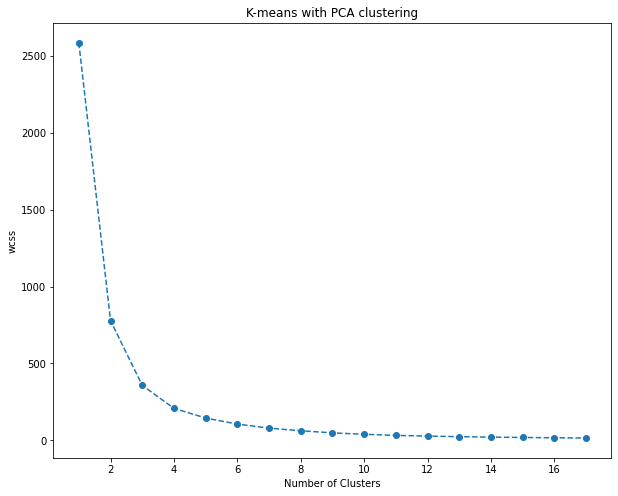

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 8))
plt.plot(range(1, 18), wcss, marker = 'o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.title("K-means with PCA clustering")
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

kmeans_pca.fit(PCA_result_scores)

KMeans(n_clusters=4, random_state=42)

In [ ]:
PCA_result_scores

array([[ 5.3810992e+00, -1.9941118e-02],
       [ 6.4751158e+00, -9.9140545e-03],
       [ 7.0124011e+00, -2.1929262e-02],
       ...,
       [-1.6431674e-01,  4.5224801e-03],
       [-2.0884460e-01,  1.8075230e-03],
       [-2.0619029e-01,  1.1068099e-03]], dtype=float32)

In [ ]:
kmeans_pca.fit(PCA_result_scores)

KMeans(n_clusters=4, random_state=42)

In [ ]:
kmeans_pca.labels_ 

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_segm = data

In [ ]:
df_segm = pd.concat([data.reset_index(drop = True), pd.DataFrame(PCA_result_scores)], axis = 1)
df_segm.columns.values[-2: ] = ['Component 1', 'Component 2']

df_segm['Segment K-means PCA'] = kmeans_pca.labels_ 

In [ ]:
df_segm['Segment'] = df_segm['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third', 3:'fourth'})



# Resources 
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/
# https://github.com/PetrKorab/Clustering-Textual-Data-with-Word2Vec/blob/main/word2vec_medium_article.ipynb

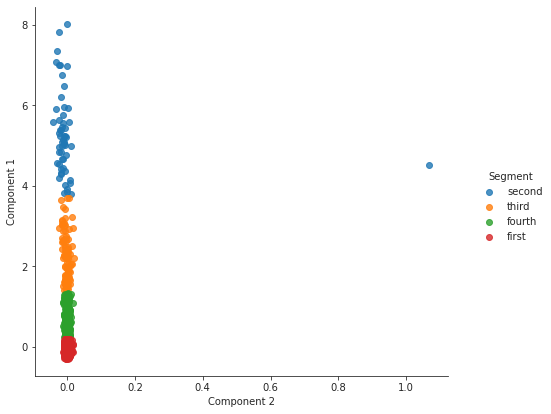

In [ ]:
sns.set_style('ticks')

fig = sns.lmplot(x='Component 2', y='Component 1',

data = df_segm,

fit_reg=False,

legend=True,

hue='Segment')

fig = plt.gcf()

fig.set_size_inches(8, 6)

plt.savefig('word2vec_clustering.png')

plt.show()

plt.show()